<a href="https://colab.research.google.com/github/NewtonSawitta/BasicProg_DataViz65/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW3

วาดกราฟ parallel coordinate เปรียบเทียบ [ราคา และ พื้นที่ใช้สอย] ของบ้านและคอนโดในจังหวัดเชียงใหม่

# Import Data

In [4]:
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### ข้อมูลที่อยู่อาศัยราย Unit

In [6]:
unit = pd.read_csv('/content/drive/MyDrive/BPDV65/opendata_unittype.csv')
unit.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_guest,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype
0,27501,unittype_9565,project_2446,2 Bedroom,2,Condo,คอนโด,NaN,37.3,2500000.0,...,1.0,1.0,NaN,NaN,NaN,NaN,2021-11-19 18:00:09,2021-11-19 17:44:45,baania,https://baania.com/th/project/เฟ-ลิค-คอนโด-ลาด...
1,28777,unittype_10267,project_3543,บ้านแฝดสองชั้น Z-2,20000,Twin house,บ้านแฝด,40.0,150.0,2390000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-27 14:30:04,2022-01-27 14:22:55,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
2,28865,unittype_471,project_143,1 Bedroom Type B,2,Condo,คอนโด,NaN,28.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-14 15:00:10,2022-01-14 14:40:04,baania,https://baania.com/th/project/วันพลัส-นายน์ทีน...
3,24988,unittype_19506,project_7766,Studio Floor 1-2,2,Condo,คอนโด,NaN,27.0,170000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-04 10:40:59,2020-10-14 01:06:48,baania,https://baania.com/th/project/บ้านสวนชมน้ำ-776...
4,38596,unittype_10290,project_3551,TH 3,3,Townhome,ทาวน์โฮม,NaN,182.0,2390000.0,...,1.0,1.0,NaN,NaN,2.0,NaN,2021-11-12 13:30:08,2021-02-03 12:12:54,baania,https://baania.com/th/project/เบล็สทาวน์-ศรีนค...


### ข้อมูลที่อยู่อาศัยรายโครงการ (Project)

In [7]:
project = pd.read_csv('/content/drive/MyDrive/BPDV65/opendata_project.csv')
project.head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project
0,7880.0,5ee08d64dda791001299b2a6,Winning Residence Sukhumvit Praksa,วินนิ่ง เรสซิเดนท์ สุขุมวิท แพรกษา,1,Detached House,บ้าน,3790000.0,developer_10678,"Winning Asset Plus Co., Ltd.",...,NaN,NaN,NaN,1.0,1.0,2020-06-10 14:36:04,NaN,2020-12-04 10:32:58,baania,https://baania.com/th/project/วินนิ่ง-เรสซิเดน...
1,16689.0,project_11326,Gift Condominium,กิ๊ฟท์ คอนโดมิเนียม,2,Condo,คอนโด,1100000.0,developer_7319,"Gift Asset Land Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2017-10-30 15:38:48,2013-01-01 07:00:00,2020-12-04 10:49:00,baania,https://baania.com/th/project/กิ๊ฟท์-คอนโดมิเน...
2,290.0,62739c4089233e001362b001,Sanrak 9 Sukprayoon Nong Krathum,แสนรัก 9 ศุขประยูร หนองกระทุ่ม,3,Townhome,ทาวน์โฮม,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-05-05 16:43:28,NaN,2022-05-05 17:30:03,baania,https://baania.com/th/project/แสนรัก-9-ศุขประย...
3,20719.0,project_2010,Baan Sansabai 1,บ้านแสนสบาย 1,1,Detached House,บ้าน,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2016-09-05 15:32:15,1970-01-02 07:00:00,2020-12-04 10:45:31,baania,https://baania.com/th/project/บ้านแสนสบาย-1-pr...
4,199.0,project_16838,Baanpruksa Ratchapruek-345,บ้านพฤกษา ราชพฤกษ์-345,3,Townhome,ทาวน์โฮม,1930000.0,developer_1026,"Preuksa Real Estate Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2019-09-05 11:49:37,1970-01-02 07:00:00,2021-03-17 12:00:04,baania,https://baania.com/th/project/บ้านพฤกษา-ราชพฤก...


In [8]:
UP = pd.merge(unit, project, on = 'project_id')  # ทำการ Merge ระหว่าง unit กับ project เข้าด้วยกัน
UP.head()

,row_number_x,unittype_id,project_id,name_th_x,propertytype_id_x,propertytype_name_en_x,propertytype_name_th_x,area_total_min_wa,area_usable_min,price_min_x,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created_y,date_finish,date_updated_y,source_y,url_project
0,27501,unittype_9565,project_2446,2 Bedroom,2,Condo,คอนโด,NaN,37.3,2500000.0,...,NaN,1.0,NaN,1.0,1.0,2016-11-10 16:56:40,2018-01-01 07:00:00,2021-11-19 18:00:09,baania,https://baania.com/th/project/เฟ-ลิค-คอนโด-ลาด...
1,38108,unittype_18502,project_2446,1 Bedroom,2,Condo,คอนโด,NaN,24.0,1390000.0,...,NaN,1.0,NaN,1.0,1.0,2016-11-10 16:56:40,2018-01-01 07:00:00,2021-11-19 18:00:09,baania,https://baania.com/th/project/เฟ-ลิค-คอนโด-ลาด...
2,2396,unittype_9564,project_2446,1 Bedroom Plus,2,Condo,คอนโด,NaN,29.0,1990000.0,...,NaN,1.0,NaN,1.0,1.0,2016-11-10 16:56:40,2018-01-01 07:00:00,2021-11-19 18:00:09,baania,https://baania.com/th/project/เฟ-ลิค-คอนโด-ลาด...
3,28777,unittype_10267,project_3543,บ้านแฝดสองชั้น Z-2,20000,Twin house,บ้านแฝด,40.0,150.0,2390000.0,...,NaN,NaN,NaN,NaN,NaN,2017-01-24 13:55:45,2022-01-01 07:00:00,2022-01-27 14:30:04,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
4,28777,unittype_10267,project_3543,บ้านแฝดสองชั้น Z-2,20000,Twin house,บ้านแฝด,40.0,150.0,2390000.0,...,NaN,NaN,NaN,NaN,NaN,2017-01-24 13:55:45,2022-01-01 07:00:00,2022-01-27 14:30:04,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...


In [9]:
province = UP[UP['province_name_th']=='เชียงใหม่']  # เลือกข้อมูลเฉพาะ เชียงใหม่
province

,row_number_x,unittype_id,project_id,name_th_x,propertytype_id_x,propertytype_name_en_x,propertytype_name_th_x,area_total_min_wa,area_usable_min,price_min_x,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created_y,date_finish,date_updated_y,source_y,url_project
3,28777,unittype_10267,project_3543,บ้านแฝดสองชั้น Z-2,20000,Twin house,บ้านแฝด,40.0,150.0,2390000.0,...,NaN,NaN,NaN,NaN,NaN,2017-01-24 13:55:45,2022-01-01 07:00:00,2022-01-27 14:30:04,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
4,28777,unittype_10267,project_3543,บ้านแฝดสองชั้น Z-2,20000,Twin house,บ้านแฝด,40.0,150.0,2390000.0,...,NaN,NaN,NaN,NaN,NaN,2017-01-24 13:55:45,2022-01-01 07:00:00,2022-01-27 14:30:04,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
5,28777,unittype_10267,project_3543,บ้านแฝดสองชั้น Z-2,20000,Twin house,บ้านแฝด,40.0,150.0,2390000.0,...,NaN,NaN,NaN,NaN,NaN,2017-01-24 13:55:45,2022-01-01 07:00:00,2022-01-27 14:30:04,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
6,4632,unittype_10268,project_3543,ทาวน์โฮม Z-1,3,Townhome,ทาวน์โฮม,24.7,156.0,1990000.0,...,NaN,NaN,NaN,NaN,NaN,2017-01-24 13:55:45,2022-01-01 07:00:00,2022-01-27 14:30:04,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
7,4632,unittype_10268,project_3543,ทาวน์โฮม Z-1,3,Townhome,ทาวน์โฮม,24.7,156.0,1990000.0,...,NaN,NaN,NaN,NaN,NaN,2017-01-24 13:55:45,2022-01-01 07:00:00,2022-01-27 14:30:04,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53613,18730,5fbe0813ee0d7f001240a3f1,5fbdfea7ee0d7f001240a3ce,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,1590000.0,...,NaN,NaN,NaN,NaN,NaN,2020-11-25 13:50:15,2021-01-01 07:00:00,2022-02-04 10:30:06,baania,https://baania.com/th/project/เซนส์เนเจอร์-2-ศ...
53615,5465,unittype_1250,project_553,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,NaN,2500000.0,...,NaN,NaN,NaN,NaN,NaN,2015-10-20 17:04:59,1970-01-02 07:00:00,2020-12-04 10:36:44,baania,https://baania.com/th/project/บ้านพิมาน-projec...
53647,21018,unittype_977,project_310,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2015-10-13 11:26:34,1970-01-02 07:00:00,2021-07-05 12:00:21,baania,https://baania.com/th/project/บ้านโมเดิร์นทาวน...
53699,18541,5fb3a735ee0d7f0012409fb0,5fb3a4032aaf680012207eae,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,82.0,1590000.0,...,NaN,NaN,NaN,NaN,NaN,2020-11-17 17:20:51,NaN,2020-12-04 10:49:30,baania,https://baania.com/th/project/กานต์รวี-2-5fb3a...


In [16]:
UP1 = province.groupby('propertytype_name_en_x')[['province_name_th','propertytype_name_en_x','price_min_x','area_total_min_wa']].head()  
UP1

,province_name_th,propertytype_name_en_x,price_min_x,area_total_min_wa
3,เชียงใหม่,Twin house,2390000.0,40.0
4,เชียงใหม่,Twin house,2390000.0,40.0
5,เชียงใหม่,Twin house,2390000.0,40.0
6,เชียงใหม่,Townhome,1990000.0,24.7
7,เชียงใหม่,Townhome,1990000.0,24.7
8,เชียงใหม่,Townhome,1990000.0,24.7
9,เชียงใหม่,Detached House,3150000.0,58.0
10,เชียงใหม่,Detached House,3150000.0,58.0
11,เชียงใหม่,Detached House,3150000.0,58.0
12,เชียงใหม่,Detached House,2800000.0,58.0


In [17]:
UPP = UP1.iloc[6:16]
UPP

,province_name_th,propertytype_name_en_x,price_min_x,area_total_min_wa
9,เชียงใหม่,Detached House,3150000.0,58.0
10,เชียงใหม่,Detached House,3150000.0,58.0
11,เชียงใหม่,Detached House,3150000.0,58.0
12,เชียงใหม่,Detached House,2800000.0,58.0
13,เชียงใหม่,Detached House,2800000.0,58.0
15,เชียงใหม่,Condo,NaN,NaN
16,เชียงใหม่,Condo,NaN,NaN
17,เชียงใหม่,Condo,NaN,NaN
18,เชียงใหม่,Condo,NaN,NaN
19,เชียงใหม่,Condo,1600000.0,NaN


# Parallel Coordinates

In [19]:
UPP['propertytype_name_en_x'].unique()

array(['Detached House', 'Condo'], dtype=object)

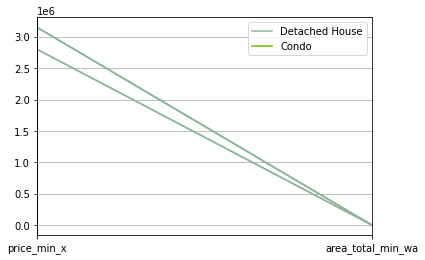

In [23]:
pd.plotting.parallel_coordinates(UPP, 'propertytype_name_en_x',cols = ['price_min_x','area_total_min_wa'])